In [1]:
import numpy as np
import tensorflow as tf



In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout,Dense,Rescaling,Flatten

In [3]:
data_dir = 'PlantVillage-20250503T083021Z-001/PlantVillage'
train_set = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = 'training',
    seed = 123,
    image_size = (128,128),
    batch_size = 32
)
test_set = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = 'validation',
    seed =123,
    image_size = (128,128),
    batch_size = 32
)

Found 20641 files belonging to 15 classes.
Using 16513 files for training.
Found 20641 files belonging to 15 classes.
Using 4128 files for validation.


In [4]:
model = Sequential()
model.add(Rescaling(1/255.0,input_shape = (128,128,3)))
model.add(Conv2D(32,kernel_size=(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,kernel_size=(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation = 'relu'))
model.add(Dense(15,activation = 'softmax'))

C:\Python 320\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [5]:
model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [6]:
model.fit(train_set, epochs = 2,validation_data = test_set)

Epoch 1/2
517/517 ━━━━━━━━━━━━━━━━━━━━ 291s 558ms/step - accuracy: 0.4725 - loss: 1.7189 - val_accuracy: 0.7885 - val_loss: 0.6390
Epoch 2/2
517/517 ━━━━━━━━━━━━━━━━━━━━ 224s 433ms/step - accuracy: 0.8274 - loss: 0.5262 - val_accuracy: 0.8658 - val_loss: 0.4198


In [7]:
train_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


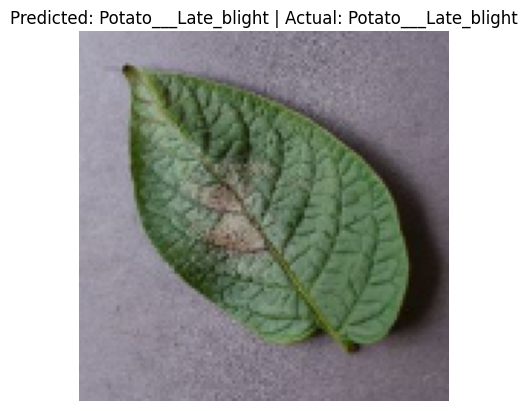

In [10]:
# Get a batch of images and labels from the training set
import matplotlib.pyplot as plt

for images, labels in train_set.take(1):
    sample_image = images[5]
    sample_label = labels[5]
    break

# Expand image dimensions to match model input (batch_size, height, width, channels)
sample_image_expanded = tf.expand_dims(sample_image, axis=0)

# Predict
prediction = model.predict(sample_image_expanded)
predicted_class_index = tf.argmax(prediction, axis=1).numpy()[0]

# Get class names
class_names = train_set.class_names
predicted_label = class_names[predicted_class_index]
actual_label = class_names[sample_label.numpy()]

# Display the image
plt.imshow(sample_image.numpy().astype("uint8"))
plt.title(f"Predicted: {predicted_label} | Actual: {actual_label}")
plt.axis('off')
plt.show()
